In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [13]:
def plot_gaussian(ax, mean, cov, color = 'red', size = 3):
    eig_w, eig_v = np.linalg.eig(cov)

    for i in range(size):
        ell = Ellipse(xy = mean,
                      width = np.sqrt(eig_w[0]) * 2 * (i+1),
                      height = np.sqrt(eig_w[1]) * 2 * (i+1),
                      angle = np.rad2deg(np.arccos(eig_v[0, 0])),
                      edgecolor = color,
                      lw = 2,
                      facecolor = 'none')  
        ax.add_artist(ell)


# $\star$ Question 1:

Run the Sklearn implementations of k-means and expectation maximization on the dataset *gaussianplus.npz*.


Plot the estimated assignments and the estimated
parameters of the two Gaussians. 

Describe how the fitting by expectation maximization outperforms the one with k-means.

Try with varying, also
very bad initializations. How stable are the results?

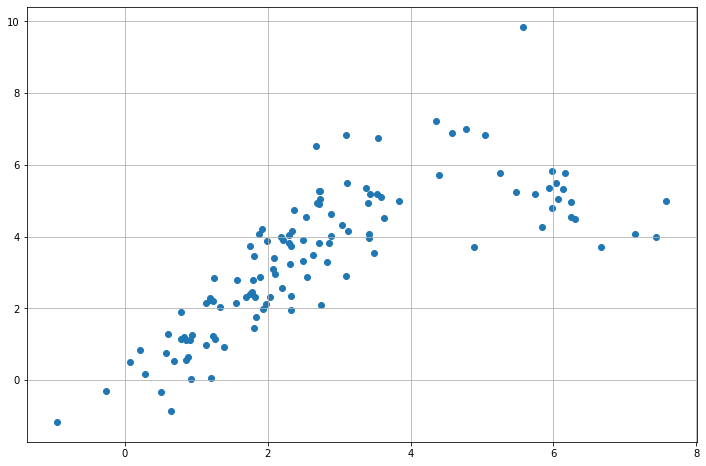

In [3]:
data = np.load('../data/gaussianplus.npz')['arr_0']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data[:, 0], data[:, 1])
ax.grid()


In [4]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[[4.44364346 5.17985058]
 [1.5529667  2.12043479]]


In [16]:
def run_and_plot_kmeans(data, init='random', k=2):
    """
    Run the kmeans algo from sklearn on input data and plot the results.

    Args:
        data: Input data
        init: Cluster centroid initialisation.
        k: Number of clusters.
    """

    kmeans = KMeans(n_clusters=k, init=init, random_state=0, n_init=1)
    kmeans.fit(data)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    print(f"Cluster centers: \n {cluster_centers}")

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.grid()

    cmap = plt.get_cmap('rainbow')
    colors = [cmap(i) for i in np.linspace(0, 1, k)]

    for i, color in enumerate(colors):
        cluster = data[labels == i]
        ax.scatter(cluster[:, 0], cluster[:, 1], color=color, label=f"Points Cluster {i + 1}")
        ax.scatter(cluster_centers[i, 0], cluster_centers[i, 1], color=color, label=f"Cluster Centroid {i + 1}", marker='x', s=200, lw=2, )
    
    ax.legend()

Cluster centers: 
 [[4.04352806 4.92971669]
 [1.38663598 1.75281102]]


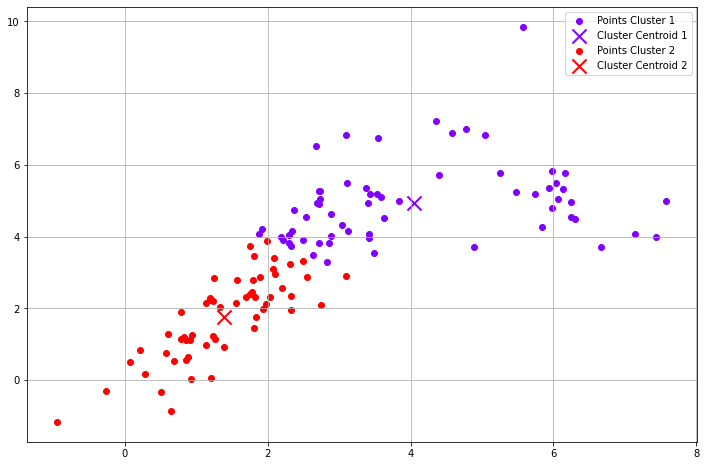

In [6]:
run_and_plot_kmeans(data)

Cluster centers: 
 [[1.57166965 2.14473835]
 [4.47527286 5.20701391]]


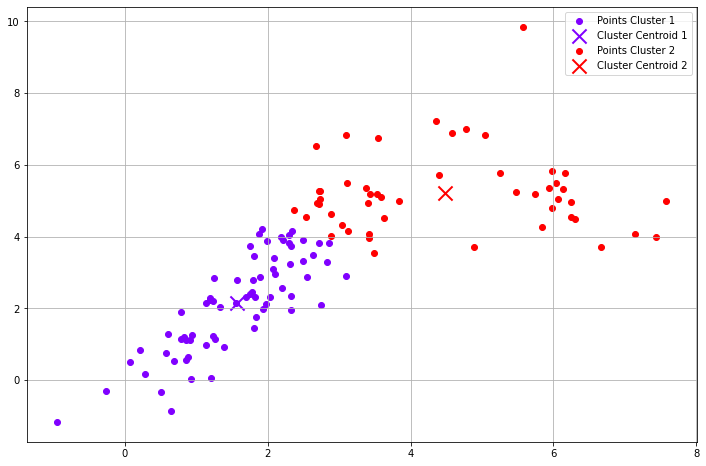

In [7]:
run_and_plot_kmeans(data, init=[[2, 2], [0, 10]])

In [9]:
em = GaussianMixture(n_components=2, init_params='random', means_init=None)
em.fit(data)
labels = em.predict(data)
weights = em.weights_
means = em.means_
covariances = em.covariances_

print(f"Means: \n {means}")
print(f"Mixture Weights: \n {weights}")

Means: 
 [[2.12199117 3.11639935]
 [6.09639223 4.95011435]]
Mixture Weights: 
 [0.83405974 0.16594026]


In [17]:
def run_and_plot_em(data, means_init=None, k=2):
    em = GaussianMixture(n_components=k, init_params='random', means_init=means_init)
    em.fit(data)
    labels = em.predict(data)
    weights = em.weights_
    means = em.means_
    covariances = em.covariances_

    print(f"Means: \n {means}")
    print(f"Mixture Weights: \n {weights}")

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.grid()
    
    cmap = plt.get_cmap('rainbow')
    colors = [cmap(i) for i in np.linspace(0, 1, k)]
    for i, color in enumerate(colors):
        cluster = data[labels==i]
        ax.scatter(cluster[:, 0], cluster[:, 1], color=color, label="Points cluster {}".format(i))
        plot_gaussian(ax, means[i], covariances[i], color=color, size=3)
        ax.scatter(means[i, 0], means[i, 1], color=color, marker="x", s=200, lw=4, label="Mean cluster {}".format(i))
        
    ax.legend()

Means: 
 [[6.11384585 4.92758878]
 [2.12875332 3.12550908]]
Mixture Weights: 
 [0.16379821 0.83620179]


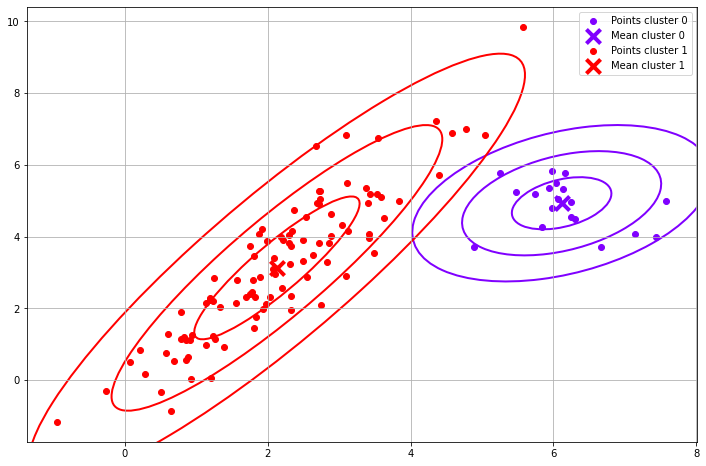

In [19]:
run_and_plot_em(data)

Means: 
 [[2.1156444  3.10767055]
 [6.07976655 4.97117578]]
Mixture Weights: 
 [0.8320284 0.1679716]


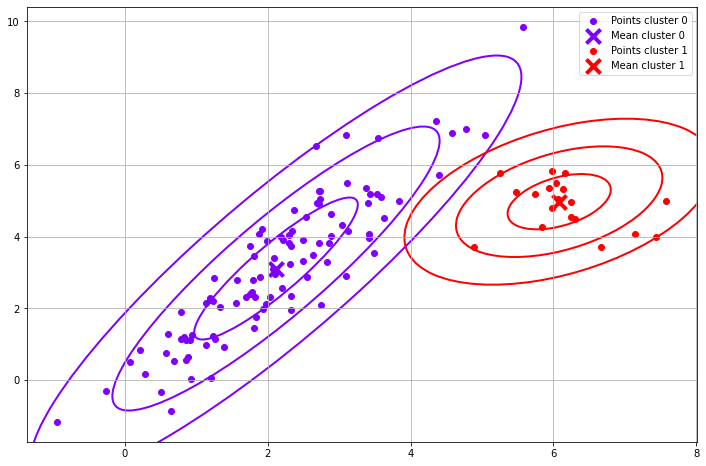

In [22]:
run_and_plot_em(data, means_init=[[0,2], [2, 4]])

# $\star\star\star$  Question 2:

Build your own implementations of k-means and EM to learn in
detail how these important algorithms work.

Compare your implementation with the sklearn
implementation.